In [ ]:
!pip install -U sahi ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 25.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4f54d177fb6fc043b92e82bf65e154a4e13f22408e6ee914c96d0c9d8beba241
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from sahi.utils.ultralytics import(
    download_yolo11n_model, download_yolo11n_seg_model,
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="n6lOqbYlwi5dpLzvUly4")
project = rf.workspace("sha-citmv").project("vehicles-tucnv")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicles-2 in yolov11:: 100%|██████████| 1266/1266 [00:00<00:00, 6774.23it/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data = {dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 472MB/s]
Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/vehicles-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save

In [ ]:
yolo11s_model_path = "runs/detect/train/weights/best.pt"
download_yolo11n_model(yolo11s_model_path)

download_from_url("https://github.com/obss/sahi/blob/main/demo/demo_data/small-vehicles1.jpeg",'demo_data/small-vehicles1.jpeg')
download_from_url("https://github.com/obss/sahi/blob/main/demo/demo_data/terrain2.png","demo_data/terrain2.png")

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov11",
    model_path=yolo11s_model_path,
    confidence_threshold=0.4,
    device="cpu",
)

In [ ]:
result = get_prediction("/content/iStock-513106144.jpg", detection_model)

In [ ]:
print(result.to_coco_annotations())

[{'image_id': None, 'bbox': [93.58564758300781, 493.9845275878906, 192.67250061035156, 243.72567749023438], 'score': 0.8576810956001282, 'category_id': 7, 'category_name': 'truck', 'segmentation': [], 'iscrowd': 0, 'area': 46959}, {'image_id': None, 'bbox': [472.794189453125, 594.5053100585938, 85.44921875, 69.44842529296875], 'score': 0.7818259000778198, 'category_id': 2, 'category_name': 'car', 'segmentation': [], 'iscrowd': 0, 'area': 5934}, {'image_id': None, 'bbox': [937.8206787109375, 584.19140625, 81.08026123046875, 69.03399658203125], 'score': 0.7504984736442566, 'category_id': 2, 'category_name': 'car', 'segmentation': [], 'iscrowd': 0, 'area': 5597}, {'image_id': None, 'bbox': [832.172119140625, 500.4752197265625, 58.83941650390625, 49.80157470703125], 'score': 0.710580050945282, 'category_id': 2, 'category_name': 'car', 'segmentation': [], 'iscrowd': 0, 'area': 2930}, {'image_id': None, 'bbox': [507.50592041015625, 457.1097106933594, 45.56866455078125, 36.472747802734375], '

In [ ]:
result = get_prediction(read_image("/content/iStock-513106144.jpg"), detection_model)

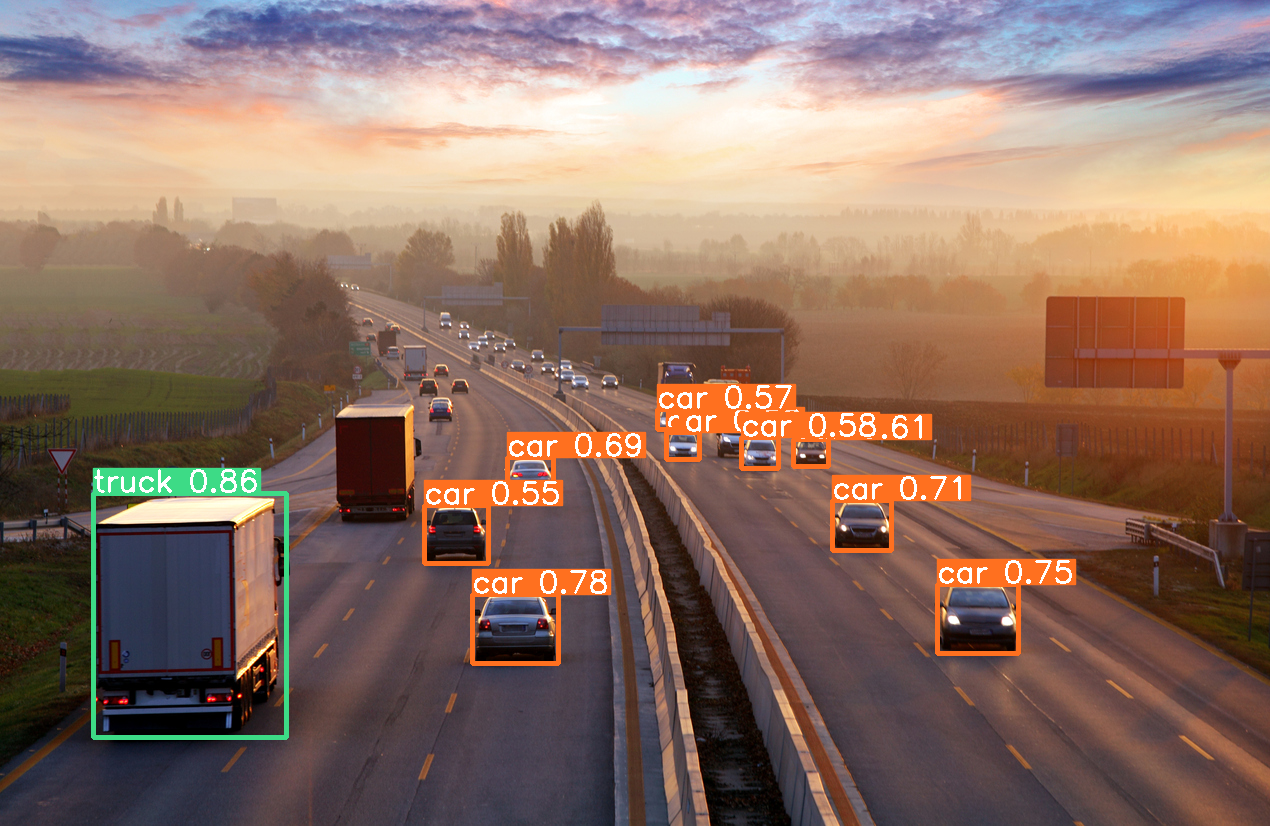

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
result = get_sliced_prediction(
    "/content/iStock-513106144.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 24 slices.


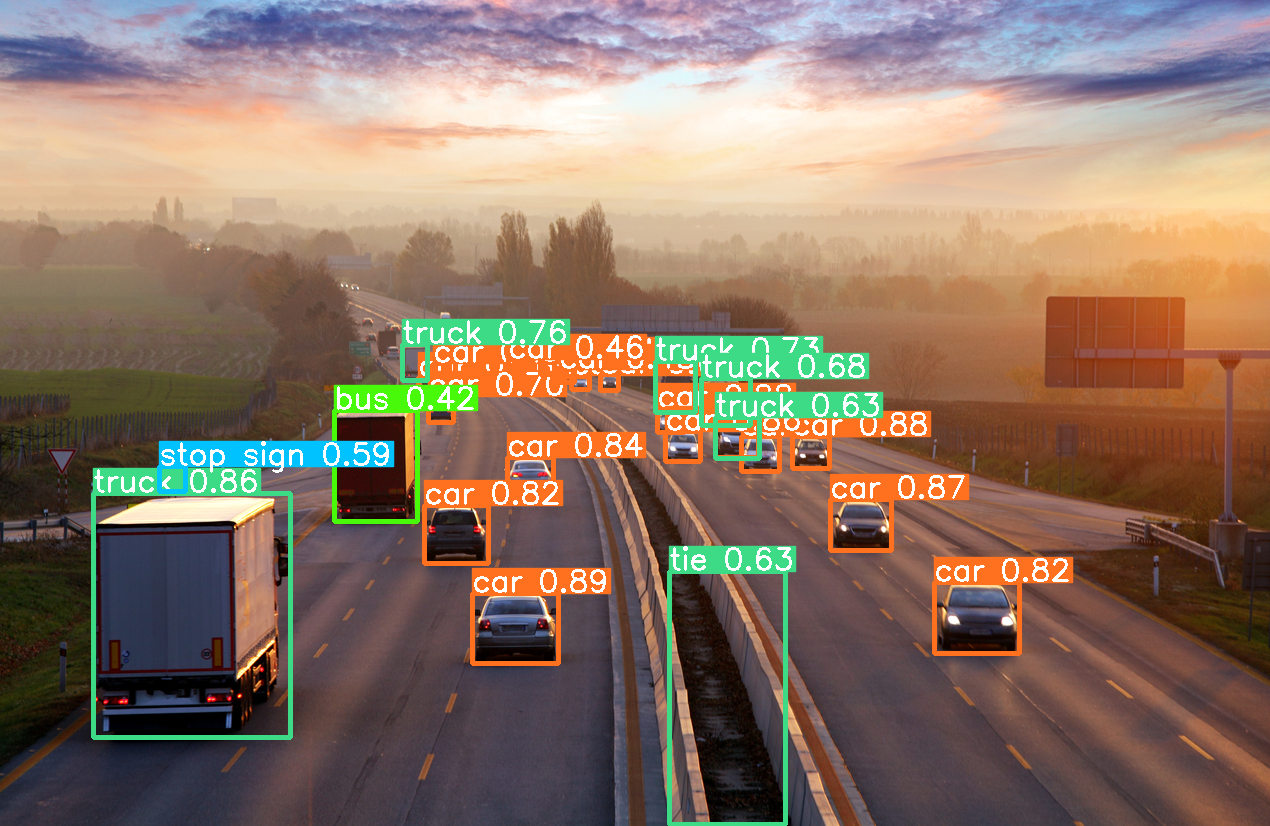

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0].bbox

BoundingBox: <(424.4090576171875, 501.7016906738281, 487.7413635253906, 567.3443603515625), w: 63.332305908203125, h: 65.64266967773438>

In [ ]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [424.4090576171875,
   501.7016906738281,
   63.332305908203125,
   65.64266967773438],
  'score': 0.7271168231964111,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 4157},
 {'image_id': None,
  'bbox': [468.24005126953125,
   589.249267578125,
   91.30926513671875,
   80.54315185546875],
  'score': 0.6635024547576904,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 7354},
 {'image_id': None,
  'bbox': [830.443603515625,
   496.5852966308594,
   63.53192138671875,
   62.336639404296875],
  'score': 0.6280924677848816,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3960}]

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [424.4090576171875,
   501.7016906738281,
   63.332305908203125,
   65.64266967773438],
  'score': 0.7271168231964111,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 4157},
 {'image_id': 1,
  'bbox': [468.24005126953125,
   589.249267578125,
   91.30926513671875,
   80.54315185546875],
  'score': 0.6635024547576904,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 7354},
 {'image_id': 1,
  'bbox': [830.443603515625,
   496.5852966308594,
   63.53192138671875,
   62.336639404296875],
  'score': 0.6280924677848816,
  'category_id': 7,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 3960}]

In [ ]:
model_type = "yolo11"
model_path = yolo11s_model_path
model_device = "cpu"
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2
source_image_dir = "demo_data/"

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 24 slices.


Performing inference on images:  33%|███▎      | 1/3 [00:08<00:17,  8.87s/it]

Prediction time is: 8772.17 ms


Performing inference on images:  33%|███▎      | 1/3 [00:10<00:20, 10.25s/it]


AttributeError: 'NoneType' object has no attribute 'ReadAsArray'